In [16]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_content(pattern, path="."):
    files = os.listdir(path)
    matches = [x for x in files if pattern in x]
    print(f"Found {len(matches)} matches: {matches}")
    name = matches[0]
    if name.endswith("npy"):
        return np.load(path+"/"+name)
    elif name.endswith("pickle"):
        with open(path+"/"+name, "rb") as f:
            return pickle.load(f)

def plot_lists(lists, legend=[], 
                legend_title="",
                figsize=(14,6), 
                subplots=(1,1),
                ax=None, x=None
                ):
    if not ax:
        _, ax = plt.subplots(*subplots, figsize=figsize)
    if x:
        [ax.plot(x, l) for l in lists]
    else:
        [ax.plot(l) for l in lists]
    ax.legend(legend, title=legend_title)
    return ax


In [17]:
val_losses_128 = get_content("val_losses", path="../DEFAULT")
train_losses_128 = get_content("train_losses", path="../DEFAULT")
val_metrics_128 = get_content("val_metrics", path="../DEFAULT")
train_metrics_128 = get_content("train_metrics", path="../DEFAULT")
duration_128 = get_content("duration", path="../DEFAULT")

prefix_100 = "conv100-fcnn128"
val_losses_100 = get_content(f"{prefix_100}-val_losses")
train_losses_100 = get_content(f"{prefix_100}-train_losses")
val_metrics_100 = get_content(f"{prefix_100}-val_metrics")
train_metrics_100 = get_content(f"{prefix_100}-train_metrics")
duration_100 = get_content(f"{prefix_100}-duration")

prefix_160 = "conv160-fcnn128"
val_losses_160 = get_content(f"{prefix_160}-val_losses")
train_losses_160 = get_content(f"{prefix_160}-train_losses")
val_metrics_160 = get_content(f"{prefix_160}-val_metrics")
train_metrics_160 = get_content(f"{prefix_160}-train_metrics")
duration_160 = get_content(f"{prefix_160}-duration")

prefix_64 = "conv64-fcnn128"
val_losses_64 = get_content(f"{prefix_64}-val_losses")
train_losses_64 = get_content(f"{prefix_64}-train_losses")
val_metrics_64 = get_content(f"{prefix_64}-val_metrics")
train_metrics_64 = get_content(f"{prefix_64}-train_metrics")
duration_64 = get_content(f"{prefix_64}-duration")

Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-val_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-train_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-duration.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv100-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv100-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed3

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


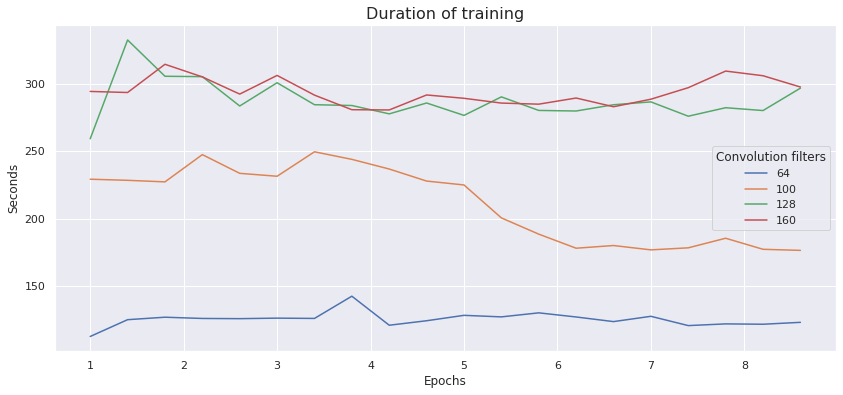

In [18]:
ax = plot_lists([duration_64, 
                duration_100,
                duration_128, 
                duration_160], 
                legend_title="Convolution filters",
                legend=[64,100,128,160])
ax.set_title("Duration of training", fontsize=16)
ax.set_xlabel("Epochs")
ax.set_xticklabels(range(20))
_ = ax.set_ylabel("Seconds")

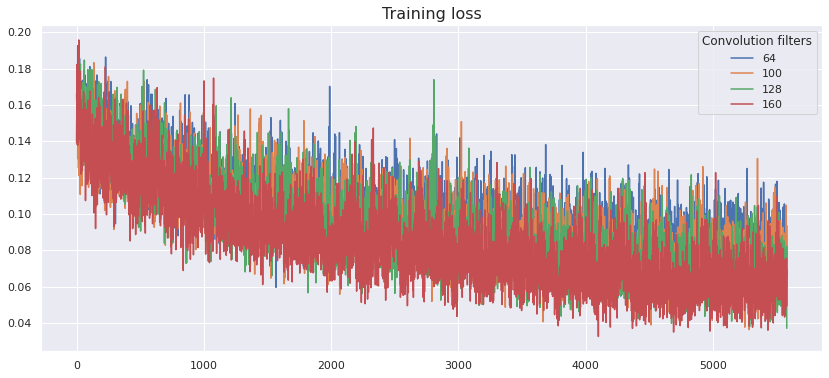

In [5]:
ax = plot_lists([train_losses_64[500:], 
                train_losses_100[500:],
                train_losses_128[500:], 
                train_losses_160[500:]], 
                legend_title="Convolution filters",
                legend=[64,100,128,160])
_ = ax.set_title("Training loss", fontsize=16)

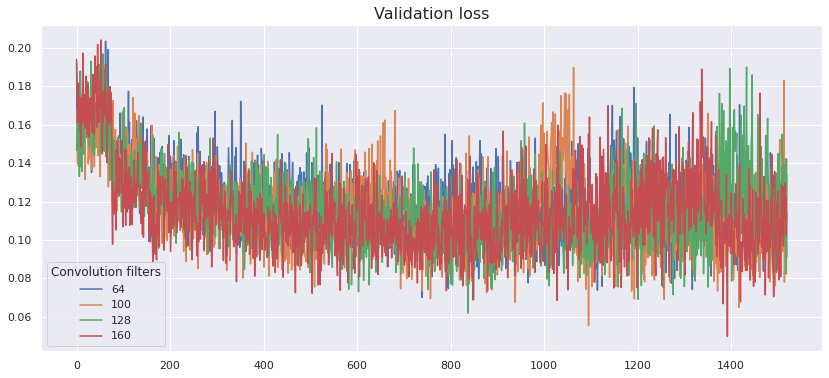

In [6]:
ax = plot_lists([val_losses_64, 
                val_losses_100,
                val_losses_128, 
                val_losses_160],                 
                legend_title="Convolution filters",
                legend=[64,100,128,160])
_ = ax.set_title("Validation loss", fontsize=16)

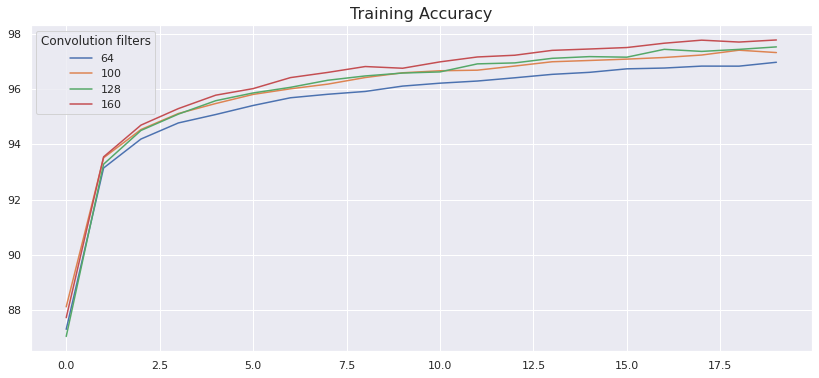

In [7]:
ax = plot_lists([train_metrics_64[:,0], 
                train_metrics_100[:,0],
                train_metrics_128[:,0], 
                train_metrics_160[:,0]], 
                legend_title="Convolution filters",
                legend=[64,100,128,160])

_ = ax.set_title("Training Accuracy", fontsize=16)

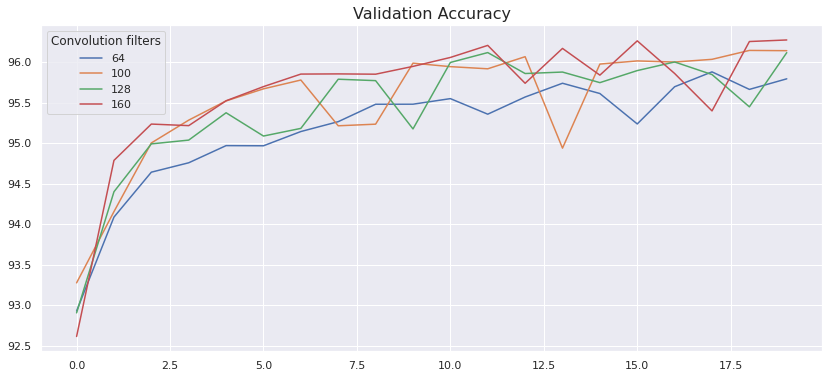

In [8]:
ax = plot_lists([val_metrics_64[:,0], 
                val_metrics_100[:,0],
                val_metrics_128[:,0], 
                val_metrics_160[:,0]],                 
                legend_title="Convolution filters",
                legend=[64,100,128,160])

_ = ax.set_title("Validation Accuracy", fontsize=16)

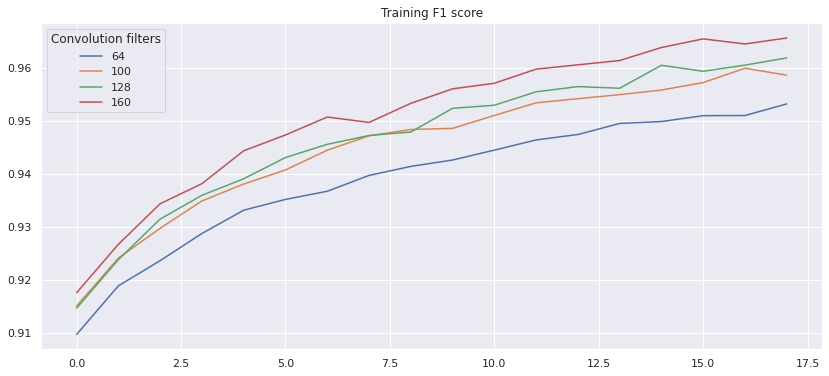

In [9]:
ax = plot_lists([train_metrics_64[:,1][2:], 
                train_metrics_100[:,1][2:], 
                train_metrics_128[:,1][2:], 
                train_metrics_160[:,1][2:]], 
                legend_title="Convolution filters",
                legend=[64,100,128,160])

_ = ax.set_title("Training F1 score")

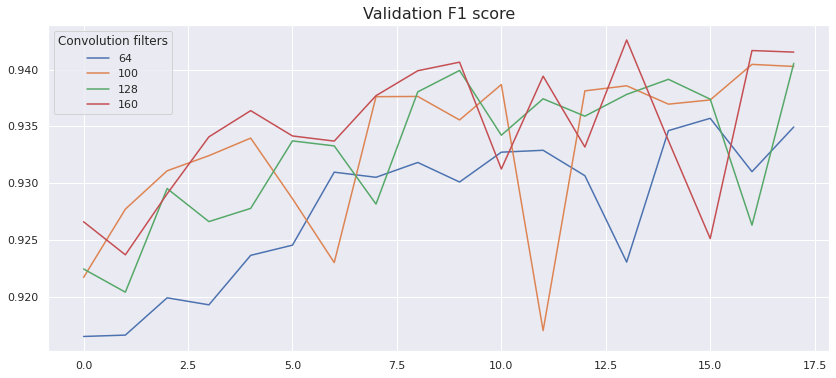

In [11]:
ax = plot_lists([val_metrics_64[:,1][2:], 
                val_metrics_100[:,1][2:], 
                val_metrics_128[:,1][2:], 
                val_metrics_160[:,1][2:]],                 
                legend_title="Convolution filters",
                legend=[64,100,128,160])

_ = ax.set_title("Validation F1 score", fontsize=16)

64     0.931960
100    0.935932
128    0.936098
160    0.936071
dtype: float64


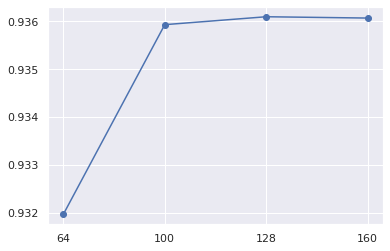

In [15]:
df = pd.DataFrame([val_metrics_64[:,1], 
                    val_metrics_100[:,1], 
                    val_metrics_128[:,1], 
                    val_metrics_160[:,1]],                 
                index=["64", "100", "128", "160"])
print(df[[12,13,14,15,16,17,18,19]].mean(axis=1))
jj = df[[12,13,14,15,16,17,18,19]].mean(axis=1)
plt.scatter(jj.index, jj.values)
plt.plot(jj.index, jj.values)